<a href="https://colab.research.google.com/github/conwayjw97/ImageColourizationModels/blob/master/DeterministicConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Variables

In [0]:
IMAGE_COUNT = 10000
TRAINING_IMAGE = 5
TEST_IMAGE = 1
BATCH_SIZE = 32
EPOCHS = 400

# Load and Run Tensorboard (NOT WORKING)

In [0]:
# !pip install -U tensorboardcolab
# from tensorboardcolab import *
# import shutil
# tbc=TensorBoardColab()

# Import Statements

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

#%load_ext tensorboard

import tensorflow as tf
import datetime, os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, layers, models, backend

TensorFlow 2.x selected.


# Load Images

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert to YUV

In [0]:
# Outputs a tensor of the same shape as the images tensor, containing the YUV 
# value of the pixels. The output is only well defined if the value in images 
# are in [0,1].
#https://zhengtq.github.io/2018/12/27/tensorflow-disturb-yuv/

train_yuvImages = tf.image.rgb_to_yuv(train_images[:IMAGE_COUNT])
train_y = tf.expand_dims(train_yuvImages[:,:,:,0], 3)
train_uv = train_yuvImages[:,:,:,1:]

test_yuvImages = tf.image.rgb_to_yuv(test_images[:IMAGE_COUNT])
test_y = tf.expand_dims(test_yuvImages[:,:,:,0], 3)
test_uv = test_yuvImages[:,:,:,1:]

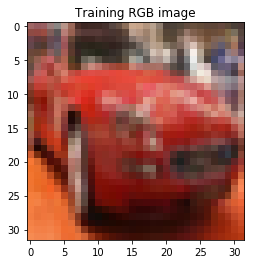

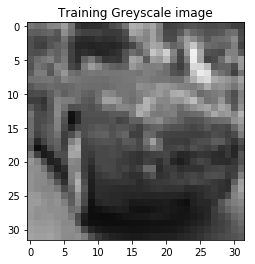

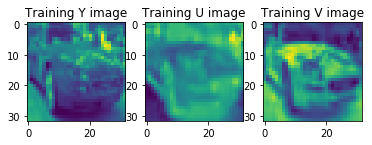

In [6]:
plt.figure()
plt.title("Training RGB image")
plt.imshow(train_images[TRAINING_IMAGE])

plt.figure()
plt.title("Training Greyscale image")
plt.imshow(tf.image.grayscale_to_rgb(train_y[TRAINING_IMAGE]))

fig = plt.figure()
fig.add_subplot(1,3,1)
plt.title("Training Y image")
plt.imshow(train_yuvImages[TRAINING_IMAGE,:,:,0])
fig.add_subplot(1,3,2)
plt.title("Training U image")
plt.imshow(train_yuvImages[TRAINING_IMAGE,:,:,1])
fig.add_subplot(1,3,3)
plt.title("Training V image")
plt.imshow(train_yuvImages[TRAINING_IMAGE,:,:,2])

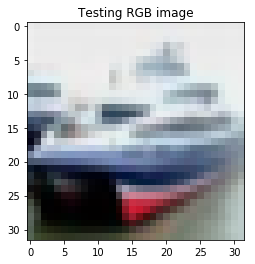

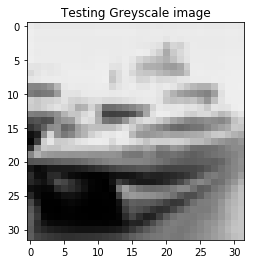

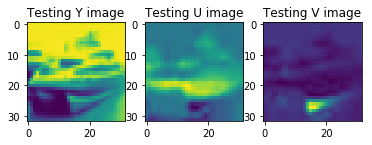

In [7]:
plt.figure()
plt.title("Testing RGB image")
plt.imshow(test_images[TEST_IMAGE])

plt.figure()
plt.title("Testing Greyscale image")
plt.imshow(tf.image.grayscale_to_rgb(test_y[TEST_IMAGE]))

fig = plt.figure()
fig.add_subplot(1,3,1)
plt.title("Testing Y image")
plt.imshow(test_yuvImages[TEST_IMAGE,:,:,0])
fig.add_subplot(1,3,2)
plt.title("Testing U image")
plt.imshow(test_yuvImages[TEST_IMAGE,:,:,1])
fig.add_subplot(1,3,3)
plt.title("Testing V image")
plt.imshow(test_yuvImages[TEST_IMAGE,:,:,2])

# Create the Convolutional Neural Network

In [8]:
# Conv2D(filters (number of output filters)
#           - determine parameter number
#        kernel_size (size of convolution window)
#        activation (activation function to use)
#        padding ("valid" or "same")
#        strides (strides of the convolution along the height and width)
#           - strides greater than 1 will downsample
#        input_shape (only used on the first layer of the model))
#
# UpSampling2D(size (upsampling factors for rows and columns))

#https://github.com/emilwallner/Coloring-greyscale-images

# def create_model():
#   model = models.Sequential()
#   model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(train_uv.shape[1], train_uv.shape[2], 1)))
#   model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
#   model.add(layers.Conv2D(8, (3, 3), activation='relu', padding='same'))
#   model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
#   model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
#   model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
#   model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
#   model.add(layers.UpSampling2D((2, 2)))
#   model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
#   model.add(layers.UpSampling2D((2, 2)))
#   model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
#   model.add(layers.UpSampling2D((2, 2)))
#   model.add(layers.Conv2D(2, (3, 3), activation='tanh', padding='same'))
#   return model

def create_model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(train_uv.shape[1], train_uv.shape[2], 1)))
  model.add(layers.Conv2D(8, (4, 4), activation='relu', padding='same', strides=2))
  model.add(layers.Conv2D(8, (4, 4), activation='relu', padding='same'))
  model.add(layers.Conv2D(16, (4, 4), activation='relu', padding='same'))
  model.add(layers.Conv2D(16, (4, 4), activation='relu', padding='same', strides=2))
  model.add(layers.Conv2D(32, (4, 4), activation='relu', padding='same'))
  model.add(layers.Conv2D(32, (4, 4), activation='relu', padding='same', strides=2))
  model.add(layers.UpSampling2D((2, 2)))
  model.add(layers.Conv2D(32, (4, 4), activation='relu', padding='same'))
  model.add(layers.UpSampling2D((2, 2)))
  model.add(layers.Conv2D(16, (4, 4), activation='relu', padding='same'))
  model.add(layers.UpSampling2D((2, 2)))
  model.add(layers.Conv2D(2, (4, 4), activation='tanh', padding='same'))
  return model

create_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        544       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 8)         4104      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 8)         1032      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 16)        2064      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 16)          4112      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          8224      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 32)          1

# Compile and Train the Model

In [9]:
# fit(x (input data)
#     y (target data)
#     batch_size (samples per gradient update)
#        - smaller batch size = more stochastic
#     epochs (epochs to train the model))


model = create_model()
model.compile(optimizer='rmsprop',
              loss='mse')

runtime_epochs = int(EPOCHS/4)
total_loss = []
total_val_loss = []

history = model.fit(x=train_y, y=train_uv, validation_data=(test_y, test_uv), batch_size=BATCH_SIZE, epochs=runtime_epochs)
total_loss += history.history["loss"]
total_val_loss += history.history["val_loss"]

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 9s 868us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 2/100
10000/10000 [==============================] - 6s 561us/sample - loss: 0.0035 - val_loss: 0.0036
Epoch 3/100
10000/10000 [==============================] - 6s 562us/sample - loss: 0.0034 - val_loss: 0.0035
Epoch 4/100
10000/10000 [==============================] - 6s 563us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 5/100
10000/10000 [==============================] - 6s 566us/sample - loss: 0.0034 - val_loss: 0.0034
Epoch 6/100
10000/10000 [==============================] - 6s 554us/sample - loss: 0.0034 - val_loss: 0.0035
Epoch 7/100
10000/10000 [==============================] - 6s 562us/sample - loss: 0.0033 - val_loss: 0.0038
Epoch 8/100
10000/10000 [==============================] - 6s 559us/sample - loss: 0.0033 - val_loss: 0.0036
Epoch 9/100
10000/10000 [==============================] - 6s 568us/sample - l

In [10]:
history = model.fit(x=train_y, y=train_uv, validation_data=(test_y, test_uv), batch_size=BATCH_SIZE, epochs=runtime_epochs)
total_loss += history.history["loss"]
total_val_loss += history.history["val_loss"]

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 6s 564us/sample - loss: 0.0018 - val_loss: 0.0038
Epoch 2/100
10000/10000 [==============================] - 6s 559us/sample - loss: 0.0018 - val_loss: 0.0039
Epoch 3/100
10000/10000 [==============================] - 6s 561us/sample - loss: 0.0018 - val_loss: 0.0042
Epoch 4/100
10000/10000 [==============================] - 6s 565us/sample - loss: 0.0018 - val_loss: 0.0039
Epoch 5/100
10000/10000 [==============================] - 6s 560us/sample - loss: 0.0018 - val_loss: 0.0039
Epoch 6/100
10000/10000 [==============================] - 6s 560us/sample - loss: 0.0018 - val_loss: 0.0041
Epoch 7/100
10000/10000 [==============================] - 6s 561us/sample - loss: 0.0018 - val_loss: 0.0038
Epoch 8/100
10000/10000 [==============================] - 6s 559us/sample - loss: 0.0018 - val_loss: 0.0040
Epoch 9/100
10000/10000 [==============================] - 6s 562us/sample - l

In [11]:
history = model.fit(x=train_y, y=train_uv, validation_data=(test_y, test_uv), batch_size=BATCH_SIZE, epochs=runtime_epochs)
total_loss += history.history["loss"]
total_val_loss += history.history["val_loss"]

Train on 10000 samples, validate on 10000 samples
Epoch 1/100
10000/10000 [==============================] - 6s 562us/sample - loss: 0.0017 - val_loss: 0.0040
Epoch 2/100
10000/10000 [==============================] - 6s 566us/sample - loss: 0.0017 - val_loss: 0.0041
Epoch 3/100
10000/10000 [==============================] - 6s 563us/sample - loss: 0.0017 - val_loss: 0.0040
Epoch 4/100
10000/10000 [==============================] - 6s 561us/sample - loss: 0.0017 - val_loss: 0.0040
Epoch 5/100
10000/10000 [==============================] - 6s 568us/sample - loss: 0.0017 - val_loss: 0.0039
Epoch 6/100
10000/10000 [==============================] - 6s 561us/sample - loss: 0.0017 - val_loss: 0.0040
Epoch 7/100
10000/10000 [==============================] - 6s 566us/sample - loss: 0.0017 - val_loss: 0.0040
Epoch 8/100
10000/10000 [==============================] - 6s 559us/sample - loss: 0.0017 - val_loss: 0.0040
Epoch 9/100
10000/10000 [==============================] - 6s 560us/sample - l

KeyboardInterrupt: ignored

In [0]:
history = model.fit(x=train_y, y=train_uv, validation_data=(test_y, test_uv), batch_size=BATCH_SIZE, epochs=runtime_epochs)
total_loss += history.history["loss"]
total_val_loss += history.history["val_loss"]

# Loss Function Results

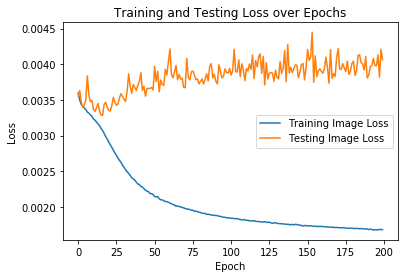

In [12]:
fig = plt.figure()
plt.title("Training and Testing Loss over Epochs")
plt.plot(total_loss, label="Training Image Loss")
plt.plot(total_val_loss, label="Testing Image Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training Results

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


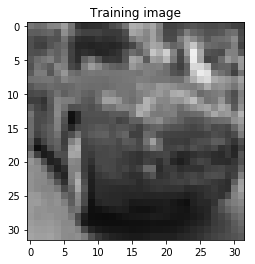

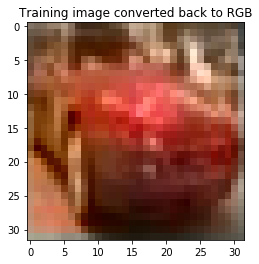

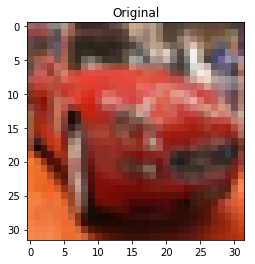

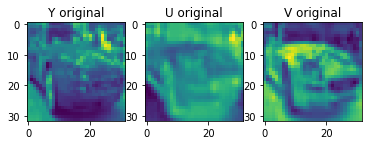

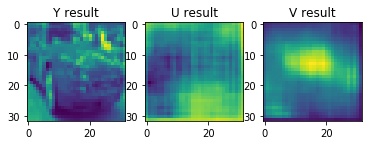

In [13]:
print(model.evaluate(train_y, train_uv, batch_size=BATCH_SIZE))
output = model.predict(train_y)
result = np.zeros((32, 32, 3))
result[:,:,0] = train_y[TRAINING_IMAGE,:,:,0]
result[:,:,1:] = output[TRAINING_IMAGE]

plt.title("Training image")
plt.imshow(tf.image.grayscale_to_rgb(train_y[TRAINING_IMAGE]))

plt.figure()
plt.title("Training image converted back to RGB")
plt.imshow(tf.image.yuv_to_rgb(result))

plt.figure()
plt.title("Original")
plt.imshow(train_images[TRAINING_IMAGE])

fig = plt.figure()
fig.add_subplot(1,3,1)
plt.title("Y original")
plt.imshow(train_yuvImages[TRAINING_IMAGE,:,:,0])
fig.add_subplot(1,3,2)
plt.title("U original")
plt.imshow(train_yuvImages[TRAINING_IMAGE,:,:,1])
fig.add_subplot(1,3,3)
plt.title("V original")
plt.imshow(train_yuvImages[TRAINING_IMAGE,:,:,2])

fig = plt.figure()
fig.add_subplot(1,3,1)
plt.title("Y result")
plt.imshow(result[:,:,0])
fig.add_subplot(1,3,2)
plt.title("U result")
plt.imshow(result[:,:,1])
fig.add_subplot(1,3,3)
plt.title("V result")
plt.imshow(result[:,:,2])

# Testing Results

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


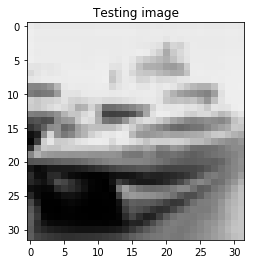

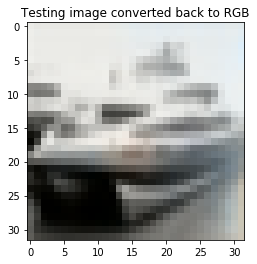

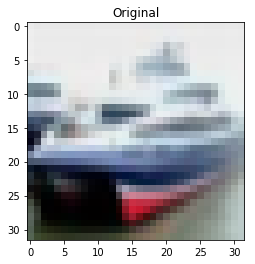

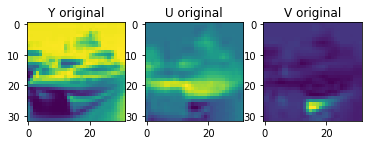

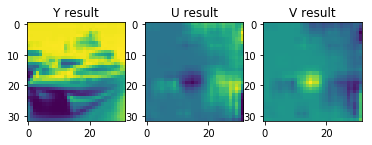

In [14]:
print(model.evaluate(test_y, test_uv, batch_size=BATCH_SIZE))
output = model.predict(test_y)
result = np.zeros((32, 32, 3))
result[:,:,0] = test_y[TEST_IMAGE,:,:,0]
result[:,:,1:] = output[TEST_IMAGE]

plt.title("Testing image")
plt.imshow(tf.image.grayscale_to_rgb(test_y[TEST_IMAGE]))

plt.figure()
plt.title("Testing image converted back to RGB")
plt.imshow(tf.image.yuv_to_rgb(result))

plt.figure()
plt.title("Original")
plt.imshow(test_images[TEST_IMAGE])

fig = plt.figure()
fig.add_subplot(1,3,1)
plt.title("Y original")
plt.imshow(test_yuvImages[TEST_IMAGE,:,:,0])
fig.add_subplot(1,3,2)
plt.title("U original")
plt.imshow(test_yuvImages[TEST_IMAGE,:,:,1])
fig.add_subplot(1,3,3)
plt.title("V original")
plt.imshow(test_yuvImages[TEST_IMAGE,:,:,2])

fig = plt.figure()
fig.add_subplot(1,3,1)
plt.title("Y result")
plt.imshow(result[:,:,0])
fig.add_subplot(1,3,2)
plt.title("U result")
plt.imshow(result[:,:,1])
fig.add_subplot(1,3,3)
plt.title("V result")
plt.imshow(result[:,:,2])